In [1]:
import sys
sys.path.append('../scripts')
import argparse
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import lxml.etree
import nltk
import pandas as pd
from utils import is_punct

TOKENIZER = nltk.tokenize.word_tokenize

In [2]:
songs = pd.read_csv('../data/songs.csv', sep='\t', index_col=0)
songs.head()

,category,id,lat,location,lon,year
0,amusement,115588,None,None,None,1694
1,politics and history,122324,52.0799838,"The Hague, The Netherlands",4.3113461,1828
2,love and sex,37007,50.8465573,"Brussels, Belgium",4.351697,1677
3,love and sex,27214,51.7958812,"Dordrecht, The Netherlands",4.6779351,1598
4,None,191688,51.2211097,"Antwerp, Belgium",4.3997081,1722


/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


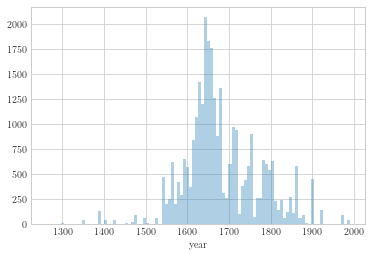

In [4]:
sns.set_palette('Blues_d', 1)
sns.distplot(songs['year'], kde=False, bins=100)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('histyeartotal.pdf')

In [5]:
songs_timeset = songs[(songs['year'] >= 1550) & (songs['year'] <= 1750)]
songs_timeset.shape

(22297, 6)

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


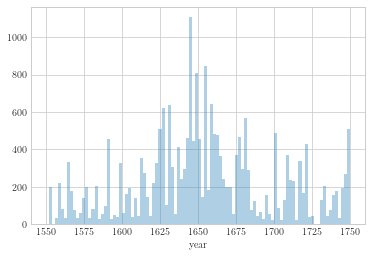

In [10]:
sns.set_palette('Blues_d', 1)
sns.distplot(songs_timeset['year'], kde=False, bins=100)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('histyear_timeset.pdf')

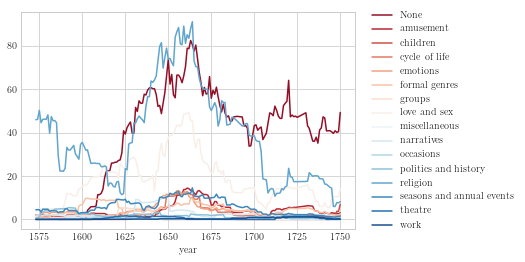

In [8]:
sns.set_palette('RdBu', 16)
fig1 = pd.crosstab(songs_timeset.year, songs_timeset.category).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('categoriesdist2.pdf', bbox_inches='tight')

In [4]:
nlb = pd.read_csv('../data/nlb.csv', sep=',')
nlb.shape

(203249, 6)

In [5]:
nlb_timeset = nlb[(nlb['jaar_begin'] >= 1550) & (nlb['jaar_begin'] <= 1750)]
nlb_timeset.shape

(81571, 6)

In [66]:
nlb_timeset.columns

Index(['recordid', 'incnormid', 'bronid', 'w_g', 'herdrukid', 'jaar_begin'], dtype='object')

In [67]:
print(nlb_timeset['recordid'].nunique())
print(nlb_timeset['incnormid'].nunique())

58445
38076


In [68]:
songs_timeset.columns

Index(['category', 'id', 'lat', 'location', 'lon', 'year'], dtype='object')

In [69]:
nlb_timeset.head()

,recordid,incnormid,bronid,w_g,herdrukid,jaar_begin
0,1,37966.0,1000604,wereldlijk,NaN,1643.0
1,2,36901.0,1000604,wereldlijk,NaN,1643.0
2,3,43989.0,1000604,wereldlijk,NaN,1643.0
3,4,38005.0,1000604,wereldlijk,NaN,1643.0
4,5,3505.0,1000604,wereldlijk,NaN,1643.0


In [70]:
songs_timeset.head()

,category,id,lat,location,lon,year
0,amusement,115588,None,None,None,1694
2,love and sex,37007,50.8465573,"Brussels, Belgium",4.351697,1677
3,love and sex,27214,51.7958812,"Dordrecht, The Netherlands",4.6779351,1598
4,None,191688,51.2211097,"Antwerp, Belgium",4.3997081,1722
5,seasons and annual events,111936,52.3745403,"Amsterdam, The Netherlands",4.89797550561798,1650


In [6]:
allsongs = pd.merge(songs_timeset, nlb_timeset, left_on='id', right_on='recordid', how='left')

In [7]:
allsongs.shape

(35947, 12)

In [8]:
allsongs.columns

Index(['category', 'id', 'lat', 'location', 'lon', 'year', 'recordid',
       'incnormid', 'bronid', 'w_g', 'herdrukid', 'jaar_begin'],
      dtype='object')

In [9]:
allsongs.head(20)

,category,id,lat,location,lon,year,recordid,incnormid,bronid,w_g,herdrukid,jaar_begin
0,amusement,115588,None,None,None,1694,115588,7020.0,1017316,wereldlijk,920847.0,1708.0
1,amusement,115588,None,None,None,1694,115588,7020.0,1001155,wereldlijk,NaN,1694.0
2,love and sex,37007,50.8465573,"Brussels, Belgium",4.351697,1677,37007,11846.0,1015612,wereldlijk,915670.0,1684.0
3,love and sex,37007,50.8465573,"Brussels, Belgium",4.351697,1677,37007,11846.0,1001870,wereldlijk,NaN,1677.0
4,love and sex,27214,51.7958812,"Dordrecht, The Netherlands",4.6779351,1598,27214,27800.0,1007038,wereldlijk,NaN,1598.0
5,None,191688,51.2211097,"Antwerp, Belgium",4.3997081,1722,191688,34576.0,1016380,geestelijk,NaN,1722.0
6,seasons and annual events,111936,52.3745403,"Amsterdam, The Netherlands",4.89797550561798,1650,111936,20878.0,1001156,wereldlijk,NaN,1650.0
7,None,182192,52.3745403,"Amsterdam, The Netherlands",4.89797550561798,1737,182192,54942.0,1016294,wereldlijk,917566.0,1746.0
8,None,182192,52.3745403,"Amsterdam, The Netherlands",4.89797550561798,1737,182192,54942.0,1016495,wereldlijk,NaN,1737.0
9,love and sex,130720,52.3745403,"Amsterdam, The Netherlands",4.89797550561798,1711,130720,22834.0,1001443,wereldlijk,912657.0,1750.0


In [10]:
print(allsongs['recordid'].nunique())
print(allsongs['incnormid'].nunique())
print(allsongs['herdrukid'].nunique())

22297
18915
13650


In [74]:
topic_songs['grouped_topics'] = topic_songs['dominant_topic']

In [75]:
topic_songs.head()

,category,id,location,incnormid,herdrukid,year,dominant_topic,perc_contribution,grouped_topics
0,amusement,115588,None,7020.0,920847.0,1708.0,41,0.356813,41
1,amusement,115588,None,7020.0,NaN,1694.0,41,0.356813,41
2,love and sex,37007,"Brussels, Belgium",11846.0,915670.0,1684.0,26,0.350637,26
3,love and sex,37007,"Brussels, Belgium",11846.0,NaN,1677.0,26,0.350637,26
4,love and sex,27214,"Dordrecht, The Netherlands",27800.0,NaN,1598.0,21,0.522934,21


In [80]:
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(28,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(18,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(9,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(0,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(13,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(31,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(4,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(44,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(40,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(36,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(1,'religion')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(35,'religion')

In [81]:
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(39,'love')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(38,'love')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(2,'love')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(30,'love')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(21,'love')
topic_songs['grouped_topics'] = topic_songs['grouped_topics'].replace(48,'love')

In [82]:
topic_songs.head(20)

,category,id,location,incnormid,herdrukid,year,dominant_topic,perc_contribution,grouped_topics
0,amusement,115588,None,7020.0,920847.0,1708.0,41,0.356813,41
1,amusement,115588,None,7020.0,NaN,1694.0,41,0.356813,41
2,love and sex,37007,"Brussels, Belgium",11846.0,915670.0,1684.0,26,0.350637,26
3,love and sex,37007,"Brussels, Belgium",11846.0,NaN,1677.0,26,0.350637,26
4,love and sex,27214,"Dordrecht, The Netherlands",27800.0,NaN,1598.0,21,0.522934,love
5,None,191688,"Antwerp, Belgium",34576.0,NaN,1722.0,1,0.291807,religion
6,seasons and annual events,111936,"Amsterdam, The Netherlands",20878.0,NaN,1650.0,11,0.435367,11
7,None,182192,"Amsterdam, The Netherlands",54942.0,917566.0,1746.0,26,0.510139,26
8,None,182192,"Amsterdam, The Netherlands",54942.0,NaN,1737.0,26,0.510139,26
9,love and sex,130720,"Amsterdam, The Netherlands",22834.0,912657.0,1750.0,23,0.792003,23


In [37]:
topic_songs.groupby('dominant_topic')['dominant_topic'].count().sort_values(ascending=False)

dominant_topic
9     3619
28    1632
18    1472
38    1408
39    1313
0     1218
31    1165
32    1128
6     1089
13    1061
44     899
24     810
30     753
2      741
27     727
40     713
1      703
12     683
4      672
5      656
19     655
17     639
48     615
7      612
46     608
47     595
36     594
49     592
14     575
8      564
10     554
21     540
16     522
3      493
29     491
42     482
33     473
34     468
15     438
23     433
37     432
35     394
26     356
11     299
22     293
25     260
45     175
41     132
43     116
20      85
Name: dominant_topic, dtype: int64

In [84]:
topic_songs.groupby('grouped_topics')['grouped_topics'].count().sort_values(ascending=False)

grouped_topics
religion    14142
love         5370
32           1128
6            1089
24            810
27            727
12            683
5             656
19            655
17            639
7             612
46            608
47            595
49            592
14            575
8             564
10            554
16            522
3             493
29            491
42            482
33            473
34            468
15            438
23            433
37            432
26            356
11            299
22            293
25            260
45            175
41            132
43            116
20             85
Name: grouped_topics, dtype: int64

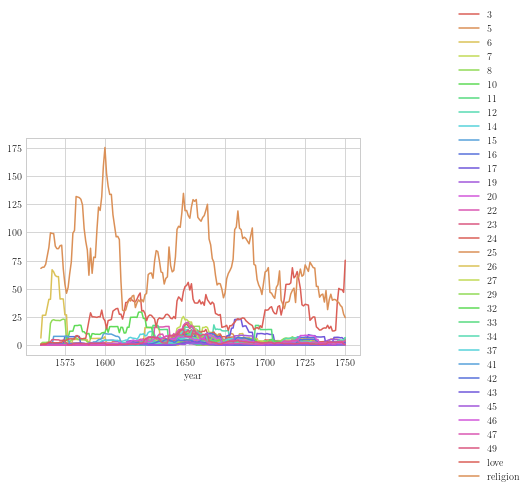

In [83]:
sns.set_palette('hls', 16)
fig1 = pd.crosstab(topic_songs.year, topic_songs.grouped_topics).rolling(window=10).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5),
          ncol=1, fancybox=False, shadow=False)

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


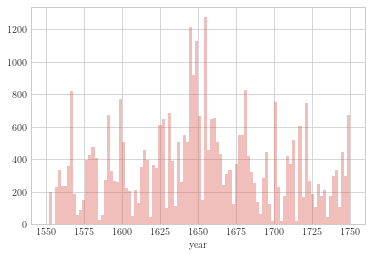

In [92]:
sns.distplot(allsongs['year'], kde=False, bins=100)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('histyear_timeset.pdf')

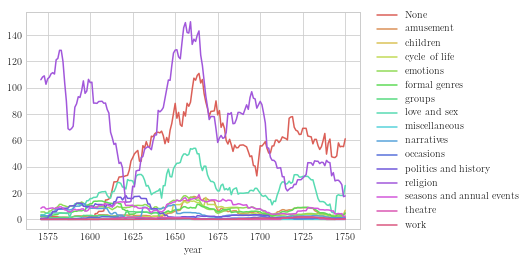

In [93]:
sns.set_palette('hls', 16)
fig2 = pd.crosstab(allsongs.year, allsongs.category).rolling(window=20).mean().plot()
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('categoriesdist_reprints.pdf', bbox_inches='tight')

In [85]:
categories = allsongs.groupby('category')['id'].count().sort_values(ascending=False)

In [86]:
print(categories.to_latex())

\begin{tabular}{lr}
\toprule
{} &     id \\
category                  &        \\
\midrule
religion                  &  13666 \\
None                      &   9116 \\
love and sex              &   4402 \\
seasons and annual events &   1726 \\
emotions                  &   1488 \\
formal genres             &   1249 \\
amusement                 &    998 \\
politics and history      &    969 \\
narratives                &    810 \\
cycle of life             &    777 \\
groups                    &    250 \\
children                  &    159 \\
occasions                 &    158 \\
theatre                   &     90 \\
work                      &     87 \\
miscellaneous             &      2 \\
\bottomrule
\end{tabular}



In [52]:
nlb_timeset.columns

Index(['recordid', 'incnormid', 'bronid', 'w_g', 'herdrukid', 'jaar_begin'], dtype='object')

In [53]:
nlb_timeset = nlb_timeset.drop(columns=['w_g', 'jaar_begin'])

In [54]:
allsongs_extended = pd.merge(topic_songs, nlb_timeset, on='incnormid', how='inner')

In [55]:
allsongs_extended.shape

(197046, 11)

In [57]:
allsongs_extended = allsongs_extended.drop(columns=['id','herdrukid_x'])

In [58]:
allsongs_extended.head(20)

,category,location,incnormid,year,dominant_topic,perc_contribution,recordid,bronid,herdrukid_y
0,amusement,None,7020.0,1708.0,41,0.356813,115588,1017316,920847.0
1,amusement,None,7020.0,1708.0,41,0.356813,115588,1001155,NaN
2,amusement,None,7020.0,1694.0,41,0.356813,115588,1017316,920847.0
3,amusement,None,7020.0,1694.0,41,0.356813,115588,1001155,NaN
4,love and sex,"Brussels, Belgium",11846.0,1684.0,26,0.350637,37007,1015612,915670.0
5,love and sex,"Brussels, Belgium",11846.0,1684.0,26,0.350637,182211,1016495,NaN
6,love and sex,"Brussels, Belgium",11846.0,1684.0,26,0.350637,196177,1019501,NaN
7,love and sex,"Brussels, Belgium",11846.0,1684.0,26,0.350637,37007,1001870,NaN
8,love and sex,"Brussels, Belgium",11846.0,1677.0,26,0.350637,37007,1015612,915670.0
9,love and sex,"Brussels, Belgium",11846.0,1677.0,26,0.350637,182211,1016495,NaN


In [42]:
allsongs_extended = allsongs_extended.drop(columns=['herdrukid_x', 'recordid'])

In [44]:
print(allsongs_extended['id'].nunique())
print(allsongs_extended['incnormid'].nunique())
print(allsongs_extended['herdrukid_y'].nunique())

22297
18915
16386


In [45]:
allsongs_extended.isna().sum()

category                 0
id                       0
location                 0
incnormid                0
year                     0
dominant_topic           0
perc_contribution        0
bronid                   0
w_g                   1534
herdrukid_y          82155
jaar_begin               0
dtype: int64

In [46]:
allsongs_extended.shape

(197046, 11)

In [47]:
dd = allsongs_extended.drop_duplicates(keep='first')

In [78]:
dd.shape

(74692, 8)

In [48]:
print(dd['id'].nunique())
print(dd['incnormid'].nunique())
print(dd['herdrukid_y'].nunique())

22297
18915
16386


In [50]:
dd.head(20)

,category,id,location,incnormid,year,dominant_topic,perc_contribution,bronid,w_g,herdrukid_y,jaar_begin
0,amusement,115588,None,7020.0,1708.0,41,0.356813,1017316,wereldlijk,920847.0,1708.0
1,amusement,115588,None,7020.0,1708.0,41,0.356813,1001155,wereldlijk,NaN,1694.0
2,amusement,115588,None,7020.0,1694.0,41,0.356813,1017316,wereldlijk,920847.0,1708.0
3,amusement,115588,None,7020.0,1694.0,41,0.356813,1001155,wereldlijk,NaN,1694.0
4,love and sex,37007,"Brussels, Belgium",11846.0,1684.0,26,0.350637,1015612,wereldlijk,915670.0,1684.0
5,love and sex,37007,"Brussels, Belgium",11846.0,1684.0,26,0.350637,1016495,wereldlijk,NaN,1737.0
6,love and sex,37007,"Brussels, Belgium",11846.0,1684.0,26,0.350637,1019501,wereldlijk,NaN,1750.0
7,love and sex,37007,"Brussels, Belgium",11846.0,1684.0,26,0.350637,1001870,wereldlijk,NaN,1677.0
8,love and sex,37007,"Brussels, Belgium",11846.0,1677.0,26,0.350637,1015612,wereldlijk,915670.0,1684.0
9,love and sex,37007,"Brussels, Belgium",11846.0,1677.0,26,0.350637,1016495,wereldlijk,NaN,1737.0


/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


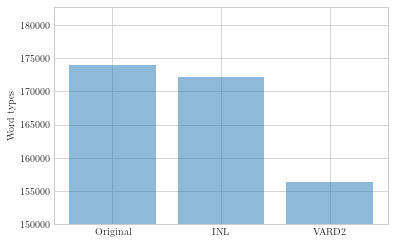

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-whitegrid')

objects = ('Original', 'INL', 'VARD2')
y_pos = np.arange(len(objects))
performance = [174016, 172184, 156324]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel('Word types')
plt.ylim(ymin=150000)
plt.savefig('Effect_normalization.pdf')